[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading Yelp review data...
Train samples: 560000, Test samples: 38000
Cleaning review content...
Text preprocessing complete.
Converting text to sequences...
Tokenization and padding completed.
Constructing LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1764099993.245130      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764099993.245835      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/5


I0000 00:00:1764099998.063670     118 cuda_dnn.cc:529] Loaded cuDNN version 90300


8750/8750 ━━━━━━━━━━━━━━━━━━━━ 106s 11ms/step - accuracy: 0.7764 - loss: 0.4313 - val_accuracy: 0.9361 - val_loss: 0.1595
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 100s 11ms/step - accuracy: 0.9403 - loss: 0.1541 - val_accuracy: 0.9411 - val_loss: 0.1482
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 100s 11ms/step - accuracy: 0.9518 - loss: 0.1269 - val_accuracy: 0.9426 - val_loss: 0.1455
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 100s 11ms/step - accuracy: 0.9608 - loss: 0.1055 - val_accuracy: 0.9413 - val_loss: 0.1582
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 100s 11ms/step - accuracy: 0.9688 - loss: 0.0856 - val_accuracy: 0.9411 - val_loss: 0.1707
Evaluating on test data...
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9392 - loss: 0.1791
Test Set Accuracy: 0.9411


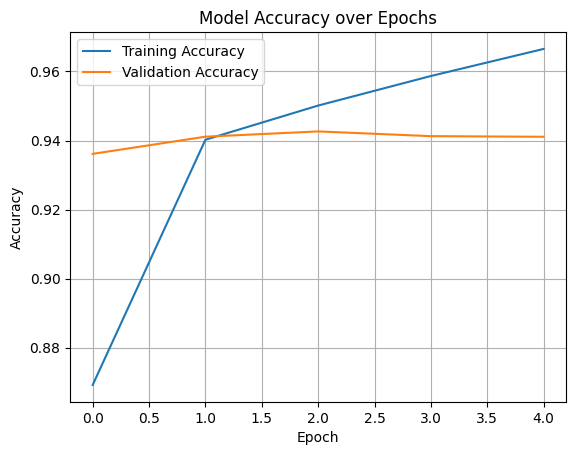

Sample prediction tests:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Review: Absolutely loved the atmosphere and the food was fantastic!
Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review: I had to wait forever and the service was terrible.
Sentiment: Negative


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

# Завантаження стоп-слів
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# === 1. Завантаження CSV файлів ===
train_path = "/kaggle/input/yelp-review-polarity/yelp_review_polarity_csv/train.csv"
test_path = "/kaggle/input/yelp-review-polarity/yelp_review_polarity_csv/test.csv"

print("Loading Yelp review data...")
train_df = pd.read_csv(train_path, header=None, names=['label', 'text'])
test_df = pd.read_csv(test_path, header=None, names=['label', 'text'])
print(f"Train samples: {len(train_df)}, Test samples: {len(test_df)}")

# === 2. Попередня обробка тексту ===
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

print("Cleaning review content...")
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)
print("Text preprocessing complete.")

# === 3. Підготовка даних ===
# Зміна міток: 1 → Negative, 2 → Positive
train_df['label'] = train_df['label'] - 1
test_df['label'] = test_df['label'] - 1

X_train = train_df['clean_text']
y_train = train_df['label']
X_test = test_df['clean_text']
y_test = test_df['label']

# === 4. Токенізація та паддінг ===
print("Converting text to sequences...")
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

sequence_length = 100
X_train_pad = pad_sequences(train_sequences, maxlen=sequence_length, padding='post')
X_test_pad = pad_sequences(test_sequences, maxlen=sequence_length, padding='post')

y_train = np.array(y_train)
y_test = np.array(y_test)

print("Tokenization and padding completed.")

# === 5. Побудова моделі LSTM ===
print("Constructing LSTM model...")
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=sequence_length),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# === 6. Навчання ===
print("Training the model...")
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test)
)

# === 7. Оцінка ===
print("Evaluating on test data...")
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Set Accuracy: {accuracy:.4f}")

# === 8. Графік точності ===
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# === 9. Функція аналізу нового тексту ===
def analyze_sentiment(input_text):
    cleaned = preprocess_text(input_text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=sequence_length, padding='post')
    prob = model.predict(padded)[0][0]
    return "Positive" if prob > 0.5 else "Negative"

# === 10. Тестові приклади ===
print("Sample prediction tests:")
sample_1 = "Absolutely loved the atmosphere and the food was fantastic!"
print(f"Review: {sample_1}\nSentiment: {analyze_sentiment(sample_1)}")

sample_2 = "I had to wait forever and the service was terrible."
print(f"Review: {sample_2}\nSentiment: {analyze_sentiment(sample_2)}")

In [3]:
def analyze_sentiment(input_text):
    cleaned = preprocess_text(input_text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=sequence_length, padding='post')
    prob = model.predict(padded)[0][0]
    return "Positive" if prob > 0.5 else "Negative"

print("\n=== Sample Prediction Tests ===")

test_reviews = [
    "Absolutely loved the atmosphere and the food was fantastic!",
    "I had to wait forever and the service was terrible.",
    "The burger was decent, but I’ve had better.",
    "The staff were friendly, but the place was too noisy.",
    "Perfect evening — everything was great from start to finish!",
    "Food was cold, tasteless, and overpriced. Never coming back.",
    "Average experience. Not bad, but not great either.",
    "The dessert was amazing! I can’t stop thinking about it.",
    "It took them 30 minutes to bring my drink. Very disappointed.",
    "The pizza was okay, but the crust was too chewy.",
    "Fantastic service and cozy interior. Highly recommend!",
    "They messed up my order twice. Horrible experience.",
    "It’s a solid place for lunch if you’re not too picky.",
    "The sushi was fresh and flavorful — would definitely return.",
    "Rude staff and dirty tables. Worst restaurant I’ve been to."
]

for review in test_reviews:
    sentiment = analyze_sentiment(review)
    print(f"\nReview: {review}\nPredicted Sentiment: {sentiment}")


=== Sample Prediction Tests ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Review: Absolutely loved the atmosphere and the food was fantastic!
Predicted Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Review: I had to wait forever and the service was terrible.
Predicted Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Review: The burger was decent, but I’ve had better.
Predicted Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Review: The staff were friendly, but the place was too noisy.
Predicted Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Review: Perfect evening — everything was great from start to finish!
Predicted Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Review: Food was cold, tasteless, and overpriced. Never coming back.
Predicted Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Review: Average experience. Not bad, but not great either.
Predicted Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Review